### CSE-221710302060-Shaik Shoaib Aslam

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv')
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


## EDA
### Question 1

### Create a new data frame with required columns


In [38]:
df = pd.DataFrame(data.drop(['COMMENT_ID','AUTHOR','DATE'],axis = 1))

In [39]:
df.head()

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0


## Question 2

### Check for missing values if there are any remove them

In [40]:
df.isna().sum() # No Missing Values found

CONTENT    0
CLASS      0
dtype: int64

## Question 3

### Draw a count plot using seaborn for the column Class. Check how many records are there for spam and ham.

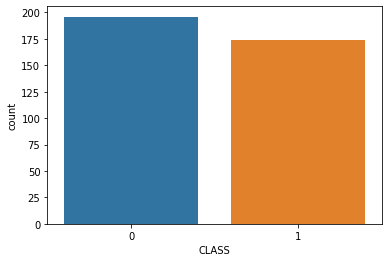

In [41]:
sns.countplot(df.CLASS)

In [48]:
df.CLASS.value_counts()

0    196
1    174
Name: CLASS, dtype: int64

#### Observations :
    0 represents spam ans 1 represents ham
    There are more spam records than ham

## Bag of words and ML 

### Apply CountVectorizer on the column Content


In [55]:
# Applying train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.CONTENT,df.CLASS,test_size = 0.2,random_state = 1)

In [56]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [57]:
word_count1 = count_vect.fit(X_train)
word_count2 = count_vect.fit(X_test)

In [58]:
word_count1.get_feature_names()
word_count2.get_feature_names()

['000',
 '0687119038',
 '10',
 '100',
 '15',
 '19',
 '1billiom',
 '25',
 '35',
 '39',
 '4000',
 '4netjobs',
 '500',
 '5000',
 '50k',
 '9nl',
 'account',
 'acidic',
 'adam',
 'adele',
 'adf',
 'advertise',
 'advertisements',
 'afflicted',
 'africa',
 'african',
 'album',
 'all',
 'already',
 'also',
 'alvar',
 'am',
 'amazement',
 'amazing',
 'amazon',
 'amp',
 'an',
 'and',
 'angels',
 'animation',
 'animator',
 'another',
 'any',
 'apostles',
 'app',
 'appreciate',
 'appreciated',
 'apprecitate',
 'apps',
 'are',
 'around',
 'as',
 'at',
 'aunt',
 'awesome',
 'bad',
 'band',
 'bass',
 'be',
 'beautiful',
 'because',
 'become',
 'been',
 'begin',
 'behavior',
 'being',
 'believe',
 'best',
 'better',
 'box',
 'boy',
 'br',
 'brazil',
 'but',
 'button',
 'by',
 'called',
 'can',
 'card',
 'cards',
 'cents',
 'chance',
 'channel',
 'check',
 'choice',
 'christians',
 'click',
 'close',
 'code',
 'columbus',
 'com',
 'comes',
 'comfort',
 'comforter',
 'coming',
 'comment',
 'comments',
 

In [61]:
doc_array1 = word_count1.transform(X_train)
doc_array2 = word_count2.transform(X_test)

In [62]:
#converting to array
doc_array1 = word_count1.transform(X_train).toarray()
doc_array2  = word_count2.transform(X_test).toarray()

In [63]:
#Converting to dataframe
feature_matrix1 = pd.DataFrame(doc_array1,columns = word_count1.get_feature_names())
feature_matrix2 = pd.DataFrame(doc_array2,columns = word_count2.get_feature_names())

In [64]:
# Apply Naive Bayes Algorithm
# import BernNB
from sklearn.naive_bayes import BernoulliNB
model_BernNB = BernoulliNB()

In [65]:
model_BernNB.fit(feature_matrix1,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [66]:
y_test_pred = model_BernNB.predict(feature_matrix2)
y_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        39
           1       0.97      0.80      0.88        35

    accuracy                           0.89        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.90      0.89      0.89        74



## TF IDF and ML


In [69]:
# TFIDF Vectorizer
## Importing TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [70]:
#Applying tfidf to data
X_train_transformed = tfidf.fit_transform(X_train)
X_train_transformed

<296x1217 sparse matrix of type '<class 'numpy.float64'>'
	with 4092 stored elements in Compressed Sparse Row format>

In [71]:
X_test_transformed = tfidf.transform(X_test)
X_test_transformed

<74x1217 sparse matrix of type '<class 'numpy.float64'>'
	with 1072 stored elements in Compressed Sparse Row format>

In [72]:
# fitting transformed X_train_transformed on BernoulliNB
model_BernNB.fit(X_train_transformed,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [73]:
y_test_pred_tfidf = model_BernNB.predict(X_test_transformed)

In [74]:
# Classification report
print(classification_report(y_test,y_test_pred_tfidf))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82        39
           1       0.95      0.54      0.69        35

    accuracy                           0.77        74
   macro avg       0.83      0.76      0.75        74
weighted avg       0.82      0.77      0.76        74

